In [1]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df1 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link7.csv')
df2 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link2.csv')
df3 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link3.csv')
df4 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link4.csv')
df5 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link5.csv')
df6 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link6.csv')
df7 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link1.csv')
df8 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link8.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df2,df1,df7,df6,df8,df4,df5,df3])
df.reset_index(inplace=True)
df

,index,Timestamp,Tx_Packet,Rx_Packet,Dropped,BW_Utilization
0,0,2020-11-06 04:30:24,33,34,0,4.584070e+04
1,1,2020-11-06 04:31:21,35,33,0,4.626071e+04
2,2,2020-11-06 04:35:26,40,5,0,4.150660e+05
3,3,2020-11-06 04:35:27,143,1,0,4.224566e+06
4,4,2020-11-06 04:35:28,142,0,0,4.165482e+06
...,...,...,...,...,...,...
3401,120,2020-11-06 04:39:41,327,274,0,8.398220e+05
3402,121,2020-11-06 04:39:41,217,0,0,3.031080e+05
3403,122,2020-11-06 04:39:41,304,3,0,4.266560e+05
3404,123,2020-11-06 04:39:42,913,1,0,1.280100e+06


In [3]:
# Because we will predict BW Util

data = df.reset_index()['BW_Utilization']

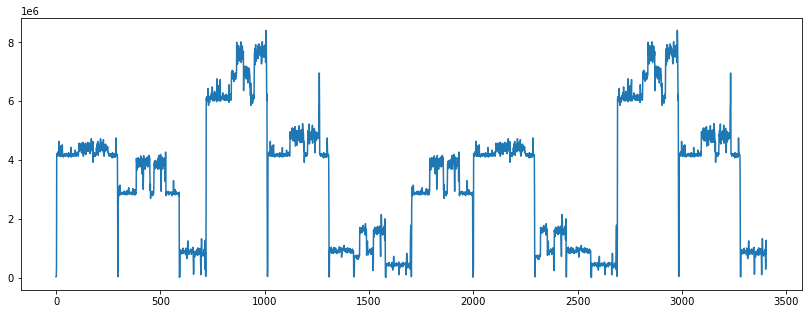

In [4]:
plt.figure(figsize =(14,5))
plt.plot(data)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

data

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.04839353],
       [0.15016566],
       [0.09962279]])

In [6]:
data = pd.DataFrame(data = data, 
                  columns = ['BW_Utilization']) 
data

,BW_Utilization
0,0.002982
1,0.003032
2,0.047011
3,0.501290
4,0.494244
...,...
3401,0.097663
3402,0.033661
3403,0.048394
3404,0.150166


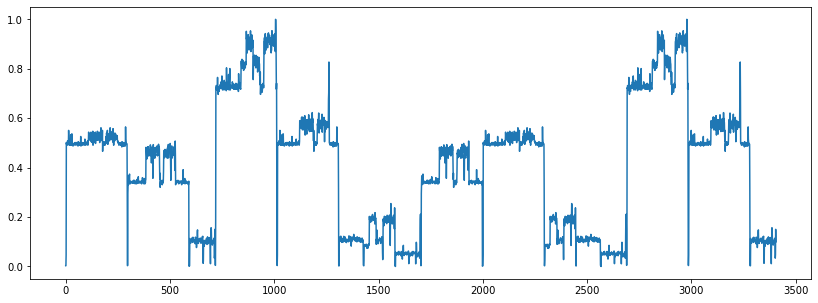

In [7]:
plt.figure(figsize =(14,5))
plt.plot(data)

In [8]:
future_days = 200

In [9]:
data = pd.DataFrame(data = data, 
                  columns = ['BW_Utilization']) 
data

,BW_Utilization
0,0.002982
1,0.003032
2,0.047011
3,0.501290
4,0.494244
...,...
3401,0.097663
3402,0.033661
3403,0.048394
3404,0.150166


In [10]:
data['Prediction'] = data[['BW_Utilization']].shift(-future_days)
data

,BW_Utilization,Prediction
0,0.002982,0.550609
1,0.003032,0.532995
2,0.047011,0.494244
3,0.501290,0.536528
4,0.494244,0.522427
...,...,...
3401,0.097663,NaN
3402,0.033661,NaN
3403,0.048394,NaN
3404,0.150166,NaN


In [11]:
data = data.dropna()
data

,BW_Utilization,Prediction
0,0.002982,0.550609
1,0.003032,0.532995
2,0.047011,0.494244
3,0.501290,0.536528
4,0.494244,0.522427
...,...,...
3201,0.616065,0.097663
3202,0.543477,0.033661
3203,0.573603,0.048394
3204,0.593970,0.150166


In [12]:
x = data.drop('Prediction', axis=1)

In [13]:
y = data['Prediction']

In [14]:
y

0       0.550609
1       0.532995
2       0.494244
3       0.536528
4       0.522427
          ...   
3201    0.097663
3202    0.033661
3203    0.048394
3204    0.150166
3205    0.099623
Name: Prediction, Length: 3206, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.25)

In [16]:
rfg = RandomForestRegressor()

In [17]:
rfg.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
y_pred = rfg.predict(x_test)

In [19]:
rfg_plot = pd.DataFrame({'Test':y_test, 'Predition':y_pred})

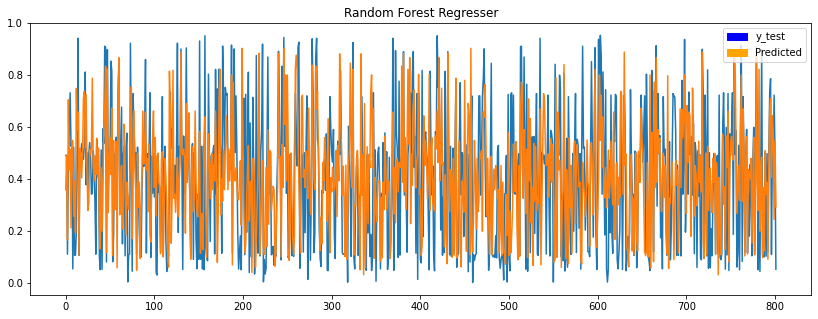

In [20]:
plt.figure(figsize=(14,5))
plt.title('Random Forest Regresser')
plt.plot(rfg_plot)
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(loc='upper right', handles=[blue, orange])

plt.show()

In [21]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.23315833943822725

In [22]:
mean_absolute_error(y_test, y_pred)

0.17622341301455394

In [23]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50,),  activation='relu', solver='adam',    alpha=0.001,batch_size=64,
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.5,
               nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

In [24]:
mlp.fit(x_train, y_train)

MLPRegressor(alpha=0.001, batch_size=64, early_stopping=True,
             hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
             max_iter=1000, momentum=0.5)

In [25]:
y_pred = mlp.predict(x_test)

In [26]:
mlp_plot = pd.DataFrame({'Test':y_test, 'Predition':y_pred})

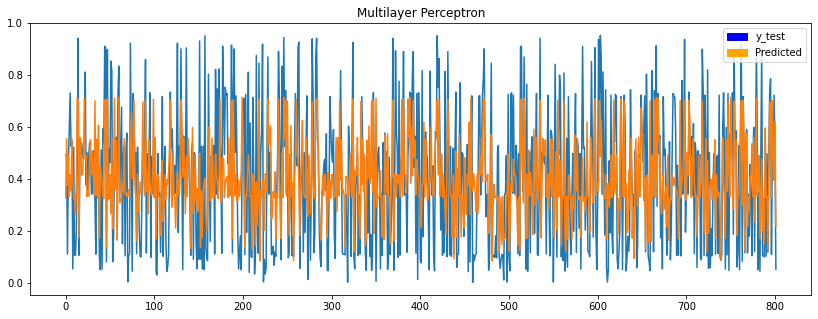

In [27]:
plt.figure(figsize=(14,5))
plt.title('Multilayer Perceptron')
plt.plot(mlp_plot)
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(loc='upper right', handles=[blue, orange])

plt.show()

In [28]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.21070871006113034

In [29]:
mean_absolute_error(y_test, y_pred)

0.1735840294234859